# 🤖 Model Training

# 📈 Gradient Boosting Classifier

This notebook provides a thorough analysis of the Gradient Boosting classifier, employing it to address our music genre classification challenge.

In [1]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 

import numpy as np
import pandas as pd

We start by loading the stratified data that has been split into the train and test splits respectively.

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
X_train = df_train.iloc[:,:-1]
y_train = df_train['genre']
X_test = df_test.iloc[:,:-1]
y_test = df_test['genre']

In [3]:
df_train.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,15wos7ChIkysPIrX31hwwa,https://p.scdn.co/mp3-preview/6ee63d690b1d66aa...,1,0.570390,0.609811,0.889349,0.077387,0.033733,0.000466,0.142857,...,0,0,2,1,0,2,1,0,0,4
1,7csz4sW8pAL4M378czLtlD,https://p.scdn.co/mp3-preview/b3a469eb989d29b9...,0,0.464640,0.969831,0.951197,0.163211,0.000232,0.000000,0.252492,...,0,0,0,0,2,0,0,2,0,3
2,3EG9FJ0ToLfgnc1IG2Z1wz,https://p.scdn.co/mp3-preview/d82ed534bd9772e1...,1,0.445913,0.653054,0.902531,0.118129,0.334336,0.000325,0.878738,...,0,0,1,1,0,0,1,0,0,5
3,0f37VQs969vZUL4gVfHRV9,https://p.scdn.co/mp3-preview/ab5bc6e257c6a5a4...,1,0.537343,0.941673,0.889847,0.356316,0.001725,0.000245,0.146179,...,0,0,0,0,1,0,0,0,0,3
4,42ZVk59gT4tMlrZmd8Ijxf,https://p.scdn.co/mp3-preview/ce96eec80fbfd784...,1,0.402952,0.968825,0.911015,0.120781,0.000208,0.126919,0.581395,...,0,0,0,0,3,0,1,1,0,3


In [4]:
df_test.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,5RG1HRQocUAafoCrGd9lY5,https://p.scdn.co/mp3-preview/f9772fc13fc90d56...,0,0.444812,0.270910,0.657215,0.036162,0.882530,0.000000,0.416944,...,0,0,1,1,0,0,0,0,0,5
1,5toaXJWnmQCnGRh8eOrEwE,https://p.scdn.co/mp3-preview/23b00769d9f4d4b3...,1,0.875523,0.661099,0.818493,0.013983,0.231926,0.000000,0.279070,...,3,0,0,0,0,0,0,0,0,1
2,7b7MKh1kOgwASPihOs7vve,https://p.scdn.co/mp3-preview/0269a1cb51256005...,0,0.608945,0.602772,0.818604,0.534716,0.358433,0.000000,0.174419,...,0,0,0,0,0,0,0,0,0,5
3,5Z3GHaZ6ec9bsiI5BenrbY,https://p.scdn.co/mp3-preview/05e9e3f61b30cf53...,1,0.810531,0.539416,0.862765,0.045564,0.199798,0.000017,0.239203,...,0,0,0,0,0,2,0,0,0,4
4,0m2JqPFRwdhFEvTXQNYwmB,https://p.scdn.co/mp3-preview/be8ee0a916639101...,1,0.639788,0.624896,0.847980,0.013018,0.400601,0.000000,0.144518,...,1,0,0,0,0,1,0,0,0,1


###  🧱 Developing the Model

We perform feature selection for the Gradient Boosting Classifier, using sklearn's SelectFromModel().

In [5]:
gradient = GradientBoostingClassifier()
params = { 
            'loss': ['log_loss','exponential'],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators' : [100, 200, 400],
            'criterion' :['friedman_mse', 'squared_error'],
            'min_samples_split' :[0.01, 0.05, 0.1],
            'max_depth': [3,4,5,6,],
            'max_features': ['sqrt', 'log2']
        }

#Select Features
sel = SelectFromModel(gradient)
X_train_selected = sel.fit_transform(X_train.iloc[:, 2:], y_train)

Next, we perform hyperparameter tuning using GridSearch CV to determine the best model parameters for Gradient Boosting

In [6]:
print("Selected Features Length:", len(sel.get_feature_names_out()))
print("Selected Features:", ", ".join(sel.get_feature_names_out()))

gb_grid = GridSearchCV(estimator = gradient, param_grid = params, cv = 5, n_jobs = -1)
# Fit the random search model
gb_grid.fit(X_train_selected, y_train)

Selected Features Length: 18
Selected Features: danceability, energy, loudness, speechiness, acousticness, mfcc_1Mean, mfcc_3Mean, mfcc_5Std, mfcc_7Std, spect_centroid_Std, spect_contrast_Mean, artist_genre_contemporary, artist_genre_country, artist_genre_hip, artist_genre_hop, artist_genre_metal, artist_genre_pop, artist_genre_rap


/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py", line 444, in fit
    self._check_params()
  File "/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_gb.py", line 301, in _ch

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 400]})

In [7]:
# Best parameters based on GridSearchCV
gb_grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 0.1,
 'n_estimators': 100}

### 📝 Model Evaluation

Create and fit the final Gradient Boosting model based on the hyperparameters found through GridSearchCV above

In [8]:
gradientBooster = GradientBoostingClassifier(**gb_grid.best_params_)
gradientBooster.fit(X_train_selected, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           max_depth=6, max_features='sqrt',
                           min_samples_split=0.1)

Evaluate the Gradient Boosting Classifier on the test set and determine it's accuracy.

In [9]:
X_test_selected = X_test[sel.get_feature_names_out()]
predictions = gradientBooster.predict(X_test_selected)
acc = metrics.accuracy_score(predictions,y_test)
acc

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


0.8358433734939759

### 🏁 Model Performance

Finally, we generate the confusion matrix and performance metrics to determine our Gradient Boosting Classifier's performance

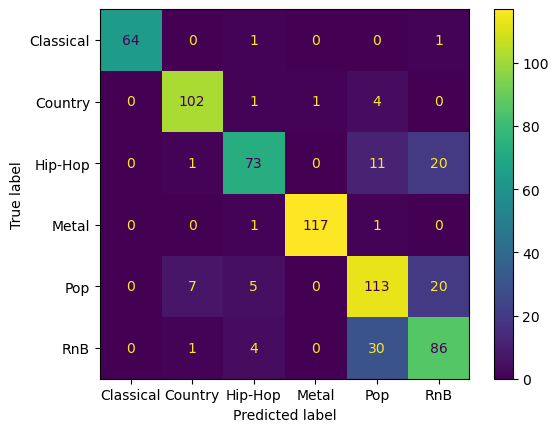

In [10]:
labels = ['Classical', 'Country', 'Hip-Hop', 'Metal', 'Pop', 'RnB']
matrix = metrics.confusion_matrix(predictions, y_test, labels=gradientBooster.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot()

In [11]:
print(metrics.classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

   Classical       0.97      1.00      0.98        64
     Country       0.94      0.92      0.93       111
     Hip-Hop       0.70      0.86      0.77        85
       Metal       0.98      0.99      0.99       118
         Pop       0.78      0.71      0.74       159
         RnB       0.71      0.68      0.69       127

    accuracy                           0.84       664
   macro avg       0.85      0.86      0.85       664
weighted avg       0.84      0.84      0.84       664



We conclude our analysis by concatenating our prediction and actual labels with the original DataFrame

In [35]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test)
results = pd.concat([X_test.reset_index(drop=True), actual.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)
results.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre,0
0,5RG1HRQocUAafoCrGd9lY5,https://p.scdn.co/mp3-preview/f9772fc13fc90d56...,0,0.444812,0.270910,0.657215,0.036162,0.882530,0.000000,0.416944,...,0,1,1,0,0,0,0,0,5,5
1,5toaXJWnmQCnGRh8eOrEwE,https://p.scdn.co/mp3-preview/23b00769d9f4d4b3...,1,0.875523,0.661099,0.818493,0.013983,0.231926,0.000000,0.279070,...,0,0,0,0,0,0,0,0,1,1
2,7b7MKh1kOgwASPihOs7vve,https://p.scdn.co/mp3-preview/0269a1cb51256005...,0,0.608945,0.602772,0.818604,0.534716,0.358433,0.000000,0.174419,...,0,0,0,0,0,0,0,0,5,5
3,5Z3GHaZ6ec9bsiI5BenrbY,https://p.scdn.co/mp3-preview/05e9e3f61b30cf53...,1,0.810531,0.539416,0.862765,0.045564,0.199798,0.000017,0.239203,...,0,0,0,0,2,0,0,0,4,4
4,0m2JqPFRwdhFEvTXQNYwmB,https://p.scdn.co/mp3-preview/be8ee0a916639101...,1,0.639788,0.624896,0.847980,0.013018,0.400601,0.000000,0.144518,...,0,0,0,0,1,0,0,0,1,1


# 📈 Random Forest Classifier

This notebook provides a thorough analysis of the Random Forest classifier, employing it to address our music genre classification challenge.

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, label_binarize
from sklearn import metrics 
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We start by loading the stratified data that has been split into the train and test splits respectively.

In [14]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
X_train = df_train.iloc[:,:-1]
y_train = df_train['genre']
X_test = df_test.iloc[:,:-1]
y_test = df_test['genre']
df_train.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,15wos7ChIkysPIrX31hwwa,https://p.scdn.co/mp3-preview/6ee63d690b1d66aa...,1,0.570390,0.609811,0.889349,0.077387,0.033733,0.000466,0.142857,...,0,0,2,1,0,2,1,0,0,4
1,7csz4sW8pAL4M378czLtlD,https://p.scdn.co/mp3-preview/b3a469eb989d29b9...,0,0.464640,0.969831,0.951197,0.163211,0.000232,0.000000,0.252492,...,0,0,0,0,2,0,0,2,0,3
2,3EG9FJ0ToLfgnc1IG2Z1wz,https://p.scdn.co/mp3-preview/d82ed534bd9772e1...,1,0.445913,0.653054,0.902531,0.118129,0.334336,0.000325,0.878738,...,0,0,1,1,0,0,1,0,0,5
3,0f37VQs969vZUL4gVfHRV9,https://p.scdn.co/mp3-preview/ab5bc6e257c6a5a4...,1,0.537343,0.941673,0.889847,0.356316,0.001725,0.000245,0.146179,...,0,0,0,0,1,0,0,0,0,3
4,42ZVk59gT4tMlrZmd8Ijxf,https://p.scdn.co/mp3-preview/ce96eec80fbfd784...,1,0.402952,0.968825,0.911015,0.120781,0.000208,0.126919,0.581395,...,0,0,0,0,3,0,1,1,0,3


Shows the features (columns) that are part of our dataset.

In [15]:
df_train.columns

Index(['id', 'preview_url', 'mode', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       ...
       'artist_genre_country', 'artist_genre_dance', 'artist_genre_hip',
       'artist_genre_hop', 'artist_genre_metal', 'artist_genre_pop',
       'artist_genre_rap', 'artist_genre_rock', 'artist_genre_trap', 'genre'],
      dtype='object', length=110)

### 🧱 Developing the Model

Feature selection for the random forest classifier, using SelectFromModel().

In [16]:
forest = RandomForestClassifier()
params = { 
            'n_estimators': [100,150, 200, 250],
            'max_features': ['auto','log2'],
            'max_depth' : [5,6,7,8,9],
            'min_samples_split' :[0.01, 0.05, 0.1],
        }
        
# Select features
sel = SelectFromModel(forest)
X_train_selected = sel.fit_transform(X_train.iloc[:, 2:], y_train)
print("Selected Features Length:", len(sel.get_feature_names_out()))
print("Selected Features:", ", ".join(sel.get_feature_names_out()))

Selected Features Length: 34
Selected Features: danceability, energy, loudness, speechiness, acousticness, mfcc_1Mean, mfcc_1Std, mfcc_2Mean, mfcc_2Std, mfcc_3Mean, mfcc_3Std, mfcc_4Std, mfcc_5Std, mfcc_6Std, mfcc_7Std, mfcc_8Std, mfcc_10Std, zero_cross_Mean, spect_centroid_Mean, spect_centroid_Std, spect_contrast_Mean, spect_contrast_Std, spect_bw_Mean, spect_bw_Std, spect_rolloff_Mean, spect_rolloff_Std, artist_genre_classical, artist_genre_contemporary, artist_genre_country, artist_genre_hip, artist_genre_hop, artist_genre_metal, artist_genre_pop, artist_genre_rap


Call GridSearch CV to determine the best hyperparameters for the model

In [17]:
# Grid Search CV
rf_gridcv = GridSearchCV(estimator = forest, param_grid = params, cv = 5, n_jobs = -1)
# Fit the GridSearchCV model
rf_gridcv.fit(X_train_selected, y_train)

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250]})

In [18]:
# Best parameters based on GridSearchCV
rf_gridcv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 250}

### 📝 Model Evaluation

Create and fit the final model based on the hyperparameters found through GridSearchCV

In [19]:
# Final model
final_forest = RandomForestClassifier(**rf_gridcv.best_params_)
final_forest.fit(X_train_selected, y_train)

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto', min_samples_split=0.01,
                       n_estimators=250)

Evaluate the model on the test set and determine it's accuracy.

In [20]:
X_test_selected = X_test[sel.get_feature_names_out()]
predictions = final_forest.predict(X_test_selected)
acc = metrics.accuracy_score(predictions,y_test)
acc

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8313253012048193

### 🏁 Model Performance

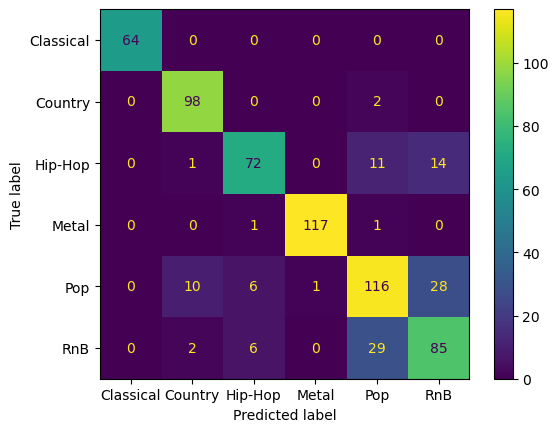

In [21]:
labels = ['Classical', 'Country', 'Hip-Hop', 'Metal', 'Pop', 'RnB']
matrix = metrics.confusion_matrix(predictions, y_test, labels=final_forest.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot()

In [22]:
print(metrics.classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00        64
     Country       0.98      0.88      0.93       111
     Hip-Hop       0.73      0.85      0.79        85
       Metal       0.98      0.99      0.99       118
         Pop       0.72      0.73      0.73       159
         RnB       0.70      0.67      0.68       127

    accuracy                           0.83       664
   macro avg       0.85      0.85      0.85       664
weighted avg       0.83      0.83      0.83       664



Concatenate predictions and actual labels to data

In [34]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test)
results = pd.concat([X_test.reset_index(drop=True), actual.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)
results.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre,0
0,5RG1HRQocUAafoCrGd9lY5,https://p.scdn.co/mp3-preview/f9772fc13fc90d56...,0,0.444812,0.270910,0.657215,0.036162,0.882530,0.000000,0.416944,...,0,1,1,0,0,0,0,0,5,5
1,5toaXJWnmQCnGRh8eOrEwE,https://p.scdn.co/mp3-preview/23b00769d9f4d4b3...,1,0.875523,0.661099,0.818493,0.013983,0.231926,0.000000,0.279070,...,0,0,0,0,0,0,0,0,1,1
2,7b7MKh1kOgwASPihOs7vve,https://p.scdn.co/mp3-preview/0269a1cb51256005...,0,0.608945,0.602772,0.818604,0.534716,0.358433,0.000000,0.174419,...,0,0,0,0,0,0,0,0,5,5
3,5Z3GHaZ6ec9bsiI5BenrbY,https://p.scdn.co/mp3-preview/05e9e3f61b30cf53...,1,0.810531,0.539416,0.862765,0.045564,0.199798,0.000017,0.239203,...,0,0,0,0,2,0,0,0,4,4
4,0m2JqPFRwdhFEvTXQNYwmB,https://p.scdn.co/mp3-preview/be8ee0a916639101...,1,0.639788,0.624896,0.847980,0.013018,0.400601,0.000000,0.144518,...,0,0,0,0,1,0,0,0,1,1


#  📈 Support Vector Machine (SVM)

This notebook provides a thorough analysis of the SVM model, employing it to address our music genre classification challenge.

In [24]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.svm import SVC

import numpy as np
import pandas as pd

We start by loading the stratified data that has been split into the train and test splits respectively.

In [25]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
X_train = df_train.iloc[:,:-1]
y_train = df_train['genre']
X_test = df_test.iloc[:,:-1]
y_test = df_test['genre']
df_train.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,15wos7ChIkysPIrX31hwwa,https://p.scdn.co/mp3-preview/6ee63d690b1d66aa...,1,0.570390,0.609811,0.889349,0.077387,0.033733,0.000466,0.142857,...,0,0,2,1,0,2,1,0,0,4
1,7csz4sW8pAL4M378czLtlD,https://p.scdn.co/mp3-preview/b3a469eb989d29b9...,0,0.464640,0.969831,0.951197,0.163211,0.000232,0.000000,0.252492,...,0,0,0,0,2,0,0,2,0,3
2,3EG9FJ0ToLfgnc1IG2Z1wz,https://p.scdn.co/mp3-preview/d82ed534bd9772e1...,1,0.445913,0.653054,0.902531,0.118129,0.334336,0.000325,0.878738,...,0,0,1,1,0,0,1,0,0,5
3,0f37VQs969vZUL4gVfHRV9,https://p.scdn.co/mp3-preview/ab5bc6e257c6a5a4...,1,0.537343,0.941673,0.889847,0.356316,0.001725,0.000245,0.146179,...,0,0,0,0,1,0,0,0,0,3
4,42ZVk59gT4tMlrZmd8Ijxf,https://p.scdn.co/mp3-preview/ce96eec80fbfd784...,1,0.402952,0.968825,0.911015,0.120781,0.000208,0.126919,0.581395,...,0,0,0,0,3,0,1,1,0,3


### 🧱 Developing the Model

We perform feature selection for the SVM model, using sklearn's SelectFromModel().

In [26]:
clf = svm.SVC(kernel='linear')

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}  

sel = SelectFromModel(clf)

X_train_selected = sel.fit_transform(X_train.iloc[:, 2:], y_train)

print("Selected Features Length:", X_train_selected.shape)
print("Selected Features Length:", len(sel.get_feature_names_out()))
print("Selected Features:", ", ".join(sel.get_feature_names_out()))

Selected Features Length: (2652, 44)
Selected Features Length: 44
Selected Features: mode, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, mfcc_1Mean, mfcc_1Std, mfcc_2Std, mfcc_3Mean, mfcc_4Std, mfcc_5Std, mfcc_6Mean, mfcc_7Mean, mfcc_7Std, mfcc_8Mean, mfcc_9Mean, mfcc_10Std, mfcc_12Mean, chroma_2Mean, chroma_3Mean, chroma_5Std, chroma_6Mean, chroma_6Std, chroma_8Mean, chroma_9Mean, chroma_9Std, chroma_10Mean, chroma_11Std, chroma_12Std, tonal_4Std, tonal_5Std, zero_cross_Mean, spect_centroid_Std, spect_contrast_Mean, spect_contrast_Std, artist_genre_contemporary, artist_genre_country, artist_genre_metal, artist_genre_pop


Next, we perform hyperparameter tuning using GridSearch CV to determine the best model parameters for SVM

In [27]:
# Grid Search CV
svm_grid = GridSearchCV(estimator = clf, param_grid = params, cv = 5, n_jobs = -1)
# Fit the GridSearchCV model
svm_grid.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [28]:
# Best parameters based on GridSearchCV
svm_grid.best_params_

{'C': 1, 'gamma': 1}

### 📝 Model Evaluation

Create and fit the final SVM model based on the hyperparameters found through GridSearchCV above

In [29]:
svm_grid.best_params_['kernel'] = 'linear'
final_svm = svm.SVC(**svm_grid.best_params_)
final_svm.fit(X_train_selected, y_train)

SVC(C=1, gamma=1, kernel='linear')

Evaluate the SVM model on the test set and determine it's accuracy.

In [30]:
X_test_selected = X_test[sel.get_feature_names_out()]
predictions = final_svm.predict(X_test_selected)
acc = metrics.accuracy_score(predictions, y_test)
acc

/opt/homebrew/anaconda3/envs/msci446/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.8599397590361446

### 🏁 Model Performance

Finally, we generate the confusion matrix and performance metrics to determine our SVM model's performance

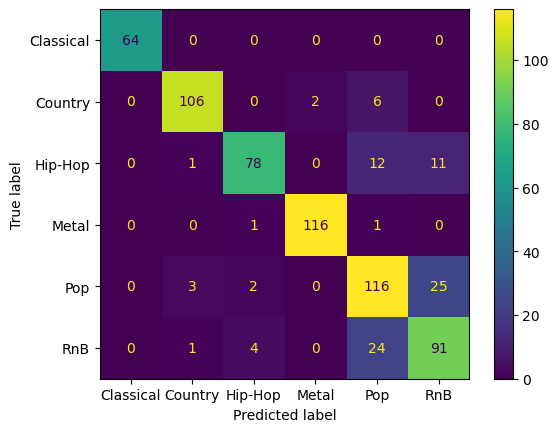

In [31]:
labels = ['Classical', 'Country', 'Hip-Hop', 'Metal', 'Pop', 'RnB']
matrix = metrics.confusion_matrix(predictions, y_test, labels=final_svm.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot()

In [32]:
print(metrics.classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00        64
     Country       0.93      0.95      0.94       111
     Hip-Hop       0.76      0.92      0.83        85
       Metal       0.98      0.98      0.98       118
         Pop       0.79      0.73      0.76       159
         RnB       0.76      0.72      0.74       127

    accuracy                           0.86       664
   macro avg       0.87      0.88      0.88       664
weighted avg       0.86      0.86      0.86       664



We conclude our analysis by concatenating our prediction and actual labels with the original DataFrame

In [33]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test)
results = pd.concat([X_test.reset_index(drop=True), actual.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)
results.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre,0
0,5RG1HRQocUAafoCrGd9lY5,https://p.scdn.co/mp3-preview/f9772fc13fc90d56...,0,0.444812,0.270910,0.657215,0.036162,0.882530,0.000000,0.416944,...,0,1,1,0,0,0,0,0,5,5
1,5toaXJWnmQCnGRh8eOrEwE,https://p.scdn.co/mp3-preview/23b00769d9f4d4b3...,1,0.875523,0.661099,0.818493,0.013983,0.231926,0.000000,0.279070,...,0,0,0,0,0,0,0,0,1,1
2,7b7MKh1kOgwASPihOs7vve,https://p.scdn.co/mp3-preview/0269a1cb51256005...,0,0.608945,0.602772,0.818604,0.534716,0.358433,0.000000,0.174419,...,0,0,0,0,0,0,0,0,5,5
3,5Z3GHaZ6ec9bsiI5BenrbY,https://p.scdn.co/mp3-preview/05e9e3f61b30cf53...,1,0.810531,0.539416,0.862765,0.045564,0.199798,0.000017,0.239203,...,0,0,0,0,2,0,0,0,4,4
4,0m2JqPFRwdhFEvTXQNYwmB,https://p.scdn.co/mp3-preview/be8ee0a916639101...,1,0.639788,0.624896,0.847980,0.013018,0.400601,0.000000,0.144518,...,0,0,0,0,1,0,0,0,1,1
